In [62]:
import os
import glob
import cv2
import pandas as pd
from matplotlib import pyplot as plt
from astropy.convolution import convolve, Gaussian1DKernel, Box1DKernel

In [63]:
data = [['Harris',1809],['Kanade',11687],['Nobel',3274]]

In [64]:
df = pd.DataFrame(data,columns=['Method','Corners'])

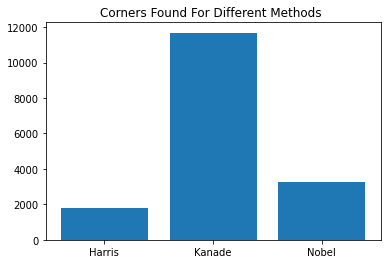

In [65]:
plt.title("Corners Found For Different Methods ")
plt.bar(df['Method'], df['Corners'])
plt.show()

In [66]:
100 * 1809/11687

15.478737058269873